In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import pandas as pd


In [3]:
def gather_png_data(folder_path): #function to read in image files
    files = glob.glob(folder_path + "/*.png")
    img_array = []
    for img in files:
        img = load_img(img, color_mode = "grayscale")
        img = img_to_array(img)  # convert PIL format to numpy array (note: 255 is white and not black)
        img_array.append(img)
    img_array = np.array(img_array)
    img_array = (img_array * (-1/255)) + 1 # inverts color, maps to -1-0, and add 1 to map to 0-1 such that 0 represents white and black represents 1
    return img_array


In [6]:
# read in data into variables 
a = gather_png_data("../data/Image data/E=0,v=0.1,lambda=0.6 Line Plots")
b = gather_png_data("../data/Image data/E=0,v=1,lambda=0.6 Line Plots")
c = gather_png_data("../data/Image data/E=0.1,v=0.1,lambda=0.6 Line Plots")
d = gather_png_data("../data/Image data/E=0.1,v=1,lambda=0.6 Line Plots")
e = gather_png_data("../data/Image data/E=0.05,v=0.1,lambda=0.6 Line Plots")
f = gather_png_data("../data/Image data/E=0.05,v=1,lambda=0.6 Line Plots")


In [7]:
data = [a,b,c,d,e,f]
class_names = [1,2,3,4,5,6] # to rename into different categories

In [8]:
x = 100 # number at which to split the array into 2

# generate own labels for training purposes, and split into test and train group
train_labels = []
test_labels = []
for i in range(len(data)):
    for j in range(len(data[i])):
        if j<x:
            test_labels.append(i)
        else:
            train_labels.append(i)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


# split data and labels into test and validation sets
split_arr = []
for i in range(len(data)):
    split = np.array_split(data[i],[0,x],axis=0) #array split returns 3 values of sub_arrays, 1 being a 0 dimension which is useless
    split_arr.append(split)
    

    
    
# create training set by stacking along axis = 0
train_data = np.vstack([split_arr[0][2],
                        split_arr[1][2],
                        split_arr[2][2],
                        split_arr[3][2],
                        split_arr[4][2],
                        split_arr[5][2]])

# create testing set
test_data = np.vstack([split_arr[0][1],
                       split_arr[1][1],
                       split_arr[2][1],
                       split_arr[3][1],
                       split_arr[4][1],
                       split_arr[5][1]])


In [9]:
split_arr[0][2].shape

(400, 417, 417, 1)

In [10]:
train_data.shape

(2400, 417, 417, 1)

In [11]:
train_labels.shape

(2400,)

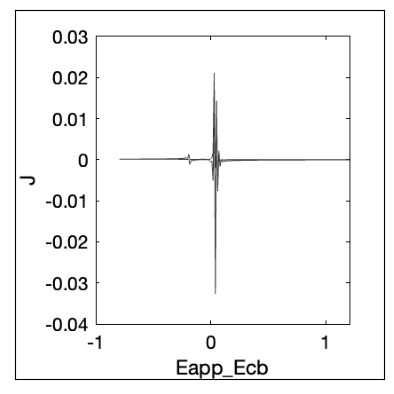

In [12]:
y = 1500 # set x to 0-2499 #
plt.figure()
plt.imshow(train_data[y], cmap = "binary")
plt.xticks([])

plt.yticks([])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(417,417,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
75/75 [==============================] - 10s 64ms/step - loss: 0.3432 - accuracy: 0.9108
Epoch 2/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0657 - accuracy: 0.9812
Epoch 3/10
75/75 [==============================] - 4s 56ms/step - loss: 0.0425 - accuracy: 0.9871
Epoch 4/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0248 - accuracy: 0.9892
Epoch 5/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0182 - accuracy: 0.9912
Epoch 6/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0239 - accuracy: 0.9917
Epoch 7/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0176 - accuracy: 0.9937
Epoch 8/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0102 - accuracy: 0.9967
Epoch 9/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 10/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0107 - accuracy: 0.9950


In [16]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2) #verbose is method of acknowledging program is running
print('\nTest accuracy:', test_acc)

19/19 - 1s - loss: 0.0669 - accuracy: 0.9817 - 752ms/epoch - 40ms/step

Test accuracy: 0.9816666841506958


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [18]:
predictions = probability_model.predict(test_data)

19/19 [==============================] - 1s 19ms/step


In [19]:
predictions[200]

array([2.9211483e-06, 3.2422584e-05, 9.9995732e-01, 3.3811566e-06,
       3.8793669e-06, 5.1148654e-09], dtype=float32)

In [20]:
#plt.imshow(test_data[212], cmap = "binary")
predicted_label = np.argmax(predictions[212])
print(predicted_label)
true_label = test_labels[212]
print(true_label)

3
2


In [21]:
def plot_image(i, predictions_array, true_label, data):
    true_label, data = true_label[i], data[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data, cmap= "binary")

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(6),class_names)
    plt.yticks([])
    thisplot = plt.bar(range(6), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

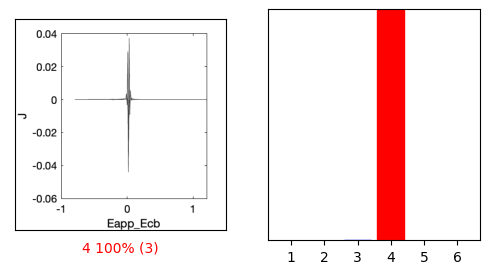

In [22]:
i = 212
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [23]:
x = 10
for i in range(x,x+10):
    print(i)
    print(2*(i-x+1)-1)

10
1
11
3
12
5
13
7
14
9
15
11
16
13
17
15
18
17
19
19


In [24]:
test_data[600] # note 600 is out of bounds, value of a in test_data[a] is 0-(x*6)-1

IndexError: index 600 is out of bounds for axis 0 with size 600

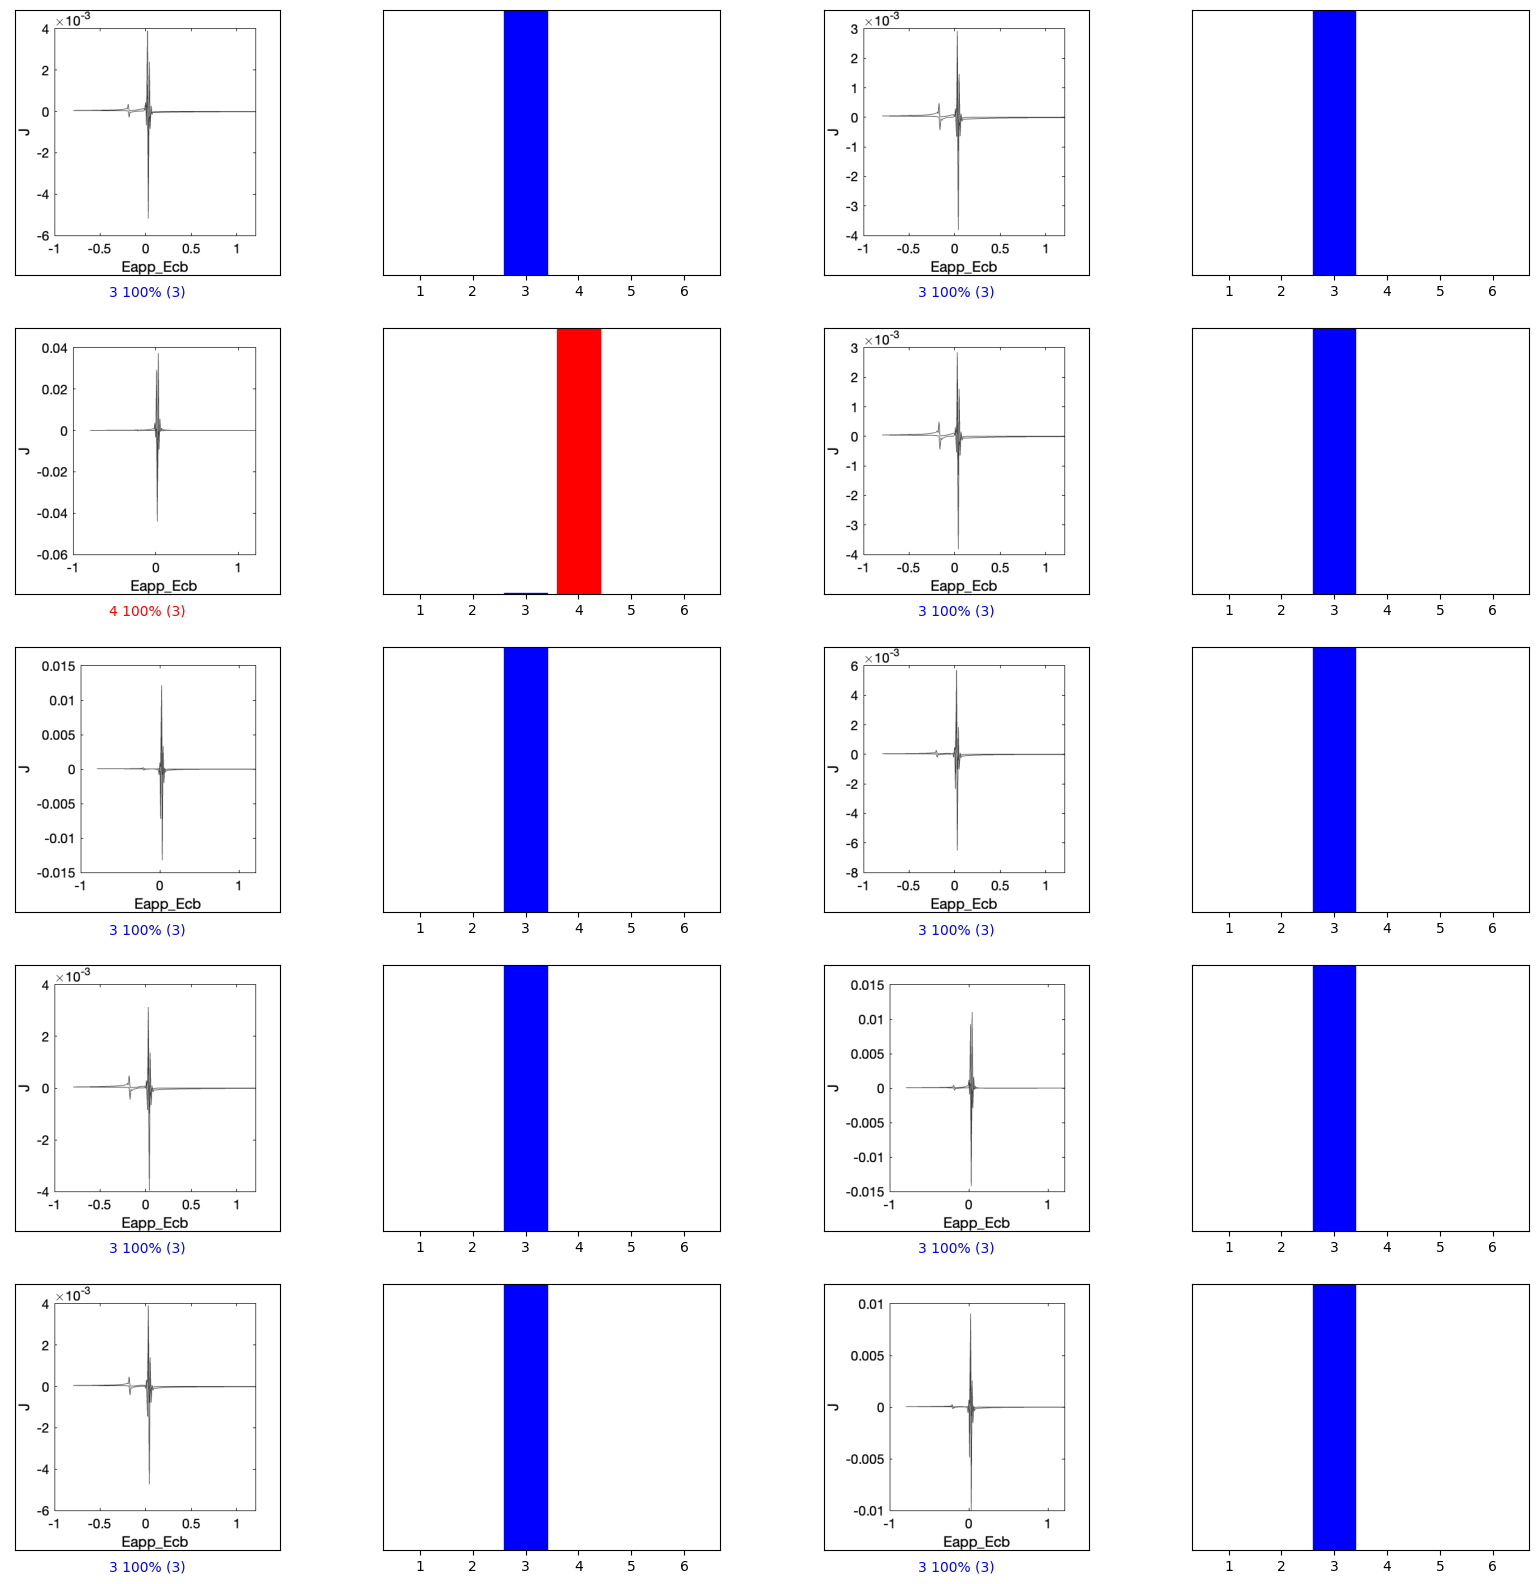

In [26]:
z = 210      # values go from 0 to 600 - 10 = 590 note: range(x,x+10) = x,x+1....,x+9

# some visualization
plt.figure(figsize=(20,20))
for i in range(z,z+10):
    plt.subplot(5,4,2*(i-z+1)-1)
    plot_image(i,predictions[i],test_labels,test_data)
    plt.subplot(5,4,2*(i-z+1))
    plot_value_array(i,predictions[i],test_labels)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


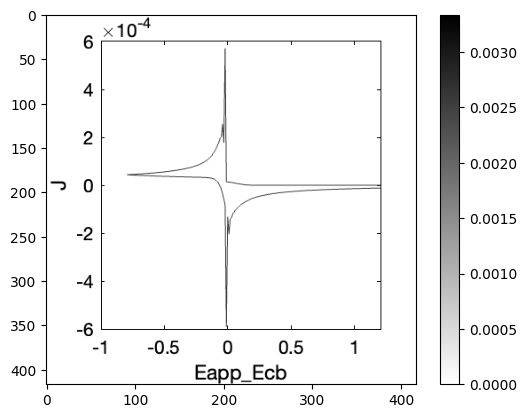

In [41]:
# how to present data as a black/white image
img = "C:/Users/Kit/Documents/PyCharm/venv/Image data/E=0,v=0.1,lambda=0.6 Line Plots/1.png"
img = load_img(img,color_mode = "grayscale")

img = img_to_array(img)
img = (img * (- 1/255)) + 1
print(img)
img = np.divide(img,255)

plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()

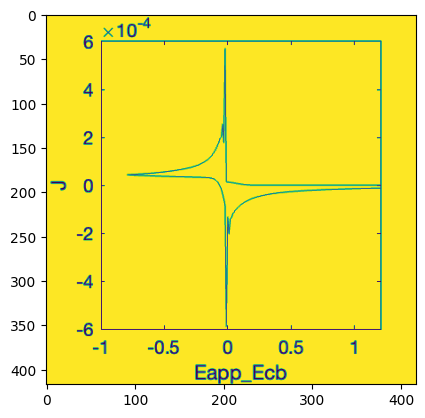

In [1]:
# running a test for git
for i in range(100):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
